In [139]:
import os
import numpy as np
import scipy.linalg 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from read_files import *
from my_interpolate import *
import pandas as pd

In [146]:
df = np.genfromtxt("shapes.txt",delimiter=None) 
print(len(df))
df1=df.T
df

112


array([[1.0035 , 1.0102 , 1.0102 , ..., 1.064  , 1.0492 , 1.0519 ],
       [0.93228, 0.92019, 0.9175 , ..., 1.0049 , 1.0197 , 1.0344 ],
       [0.86911, 0.8503 , 0.83282, ..., 0.96589, 1.0102 , 1.0197 ],
       ...,
       [0.79912, 0.79778, 0.80046, ..., 0.72522, 0.74537, 0.73597],
       [0.783  , 0.783  , 0.78703, ..., 0.74941, 0.75747, 0.75209],
       [0.75612, 0.75478, 0.75344, ..., 0.76419, 0.77493, 0.77628]])

In [149]:
df.shape[0]//2

56

In [151]:
def coordinates(a):
    return np.array([ [a[i], a[i+56]] for i in range(0,56)])
coordinates(df1[0])

array([[1.0035 , 0.46187],
       [0.93228, 0.39066],
       [0.86911, 0.32616],
       [0.77503, 0.22404],
       [0.74949, 0.17567],
       [0.71589, 0.12865],
       [0.69035, 0.12999],
       [0.6675 , 0.14611],
       [0.67019, 0.2133 ],
       [0.69573, 0.2657 ],
       [0.74277, 0.35572],
       [0.72798, 0.42156],
       [0.64465, 0.44843],
       [0.48336, 0.41081],
       [0.36508, 0.37722],
       [0.33148, 0.37184],
       [0.29116, 0.37184],
       [0.27099, 0.38931],
       [0.27099, 0.41887],
       [0.30863, 0.44171],
       [0.34492, 0.45112],
       [0.46185, 0.49277],
       [0.55997, 0.55324],
       [0.44707, 0.57876],
       [0.31401, 0.60564],
       [0.26965, 0.61504],
       [0.23202, 0.62445],
       [0.21723, 0.66207],
       [0.23336, 0.68894],
       [0.28309, 0.6876 ],
       [0.32745, 0.67551],
       [0.45917, 0.6661 ],
       [0.56804, 0.66341],
       [0.50352, 0.72791],
       [0.39331, 0.79778],
       [0.3597 , 0.81256],
       [0.32745, 0.8354 ],
 

None


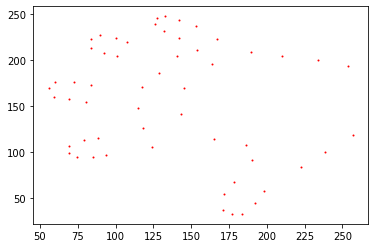

In [160]:
def showPoints(points,W=256,H=256, show = False,color = 'black'):
    points = np.array(points)
    plt.scatter(points[:,0]*W,points[:,1]*H,color=color,s = 1) 
    if show:
        plt.show()
print(showPoints(coordinates(df1[0]),W=256,H=256, show = False,color = 'red'))

None
None
None
None


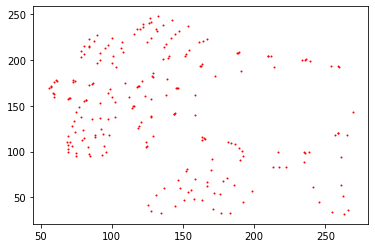

In [159]:
def showPoints(points,W=256,H=256, show = False,color = 'black'):
    points = np.array(points)
    plt.scatter(points[:,0]*W,points[:,1]*H,color=color,s = 1) 
    if show:
        plt.show()
print(showPoints(coordinates(df1[0]),W=256,H=256, show = False,color = 'red'))
print(showPoints(coordinates(df1[1]),W=256,H=256, show = False,color = 'red'))
print(showPoints(coordinates(df1[2]),W=256,H=256, show = False,color = 'red'))
print(showPoints(coordinates(df1[39]),W=256,H=256, show = False,color = 'red'))


In [95]:
b=coordinates(df[1])
b

array([[1.0102 , 0.46859],
       [0.92019, 0.38394],
       [0.8503 , 0.32347],
       [0.72664, 0.24823],
       [0.68766, 0.21061],
       [0.63927, 0.18374],
       [0.61642, 0.18911],
       [0.6003 , 0.21867],
       [0.61911, 0.27376],
       [0.66347, 0.31272],
       [0.74815, 0.39469],
       [0.71723, 0.42693],
       [0.64599, 0.44574],
       [0.48739, 0.41484],
       [0.37449, 0.38931],
       [0.32745, 0.37856],
       [0.29116, 0.38259],
       [0.27099, 0.40275],
       [0.27503, 0.42962],
       [0.31401, 0.44978]])

In [128]:
import sklearn
from sklearn import preprocessing
X_normalized = preprocessing.normalize(df, norm='l2')
X_normalized



array([[0.15448699, 0.1435228 , 0.1337979 , ..., 0.12302307, 0.12054142,
        0.11640329],
       [0.15768922, 0.14363893, 0.13272931, ..., 0.12453109, 0.12222398,
        0.11781892],
       [0.15862275, 0.14406689, 0.13077034, ..., 0.12568914, 0.12358034,
        0.118306  ],
       ...,
       [0.18388948, 0.17367532, 0.16693328, ..., 0.12533865, 0.12951938,
        0.13207378],
       [0.17135052, 0.16653271, 0.16498122, ..., 0.1217304 , 0.12370652,
        0.126558  ],
       [0.17258194, 0.16971077, 0.16729899, ..., 0.1207483 , 0.12339305,
        0.12736183]])

In [121]:
meen=np.mean(df)
sd=np.var(df)


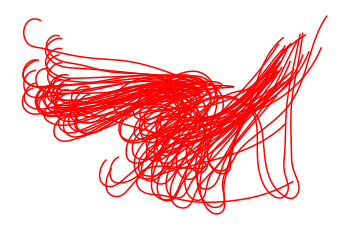

In [129]:
 for i in X_normalized:
    showInterp(interp(coordinates(i)))

In [103]:
np.mean(X_normalized,axis=0)

array([0.16472193, 0.1523694 , 0.14197575, 0.12484527, 0.11779133,
       0.11180867, 0.10827346, 0.10669452, 0.10992168, 0.11720134,
       0.12645625, 0.12148727, 0.11119998, 0.08748482, 0.07188841,
       0.06482449, 0.05827188, 0.0557227 , 0.05631193, 0.06242039,
       0.06952247, 0.08341565, 0.09955027, 0.08108309, 0.06207994,
       0.05513081, 0.04828436, 0.04643315, 0.0478027 , 0.05534845,
       0.06237283, 0.08046349, 0.09913206, 0.08526753, 0.06864178,
       0.0620027 , 0.05486082, 0.05383997, 0.05574904, 0.06302825,
       0.06988339, 0.08710866, 0.1046885 , 0.09648632, 0.08700647,
       0.08048601, 0.07520847, 0.07504059, 0.07707298, 0.08310157,
       0.09015956, 0.101181  , 0.11921118, 0.13215989, 0.14571333,
       0.15956714, 0.07683576, 0.06322873, 0.05399431, 0.0434684 ,
       0.039492  , 0.03490203, 0.03592328, 0.04013006, 0.04763401,
       0.05332556, 0.06222093, 0.06683875, 0.06836474, 0.06278517,
       0.05890788, 0.05780231, 0.05836203, 0.06118534, 0.06497

In [106]:
hand

NameError: name 'hand' is not defined

In [108]:
normalized_hands=a

In [109]:
a

array([1.0035 , 0.93228, 0.86911, 0.77503, 0.74949, 0.71589, 0.69035,
       0.6675 , 0.67019, 0.69573, 0.74277, 0.72798, 0.64465, 0.48336,
       0.36508, 0.33148, 0.29116, 0.27099, 0.27099, 0.30863, 0.34492,
       0.46185, 0.55997, 0.44707, 0.31401, 0.26965, 0.23202, 0.21723,
       0.23336, 0.28309, 0.32745, 0.45917, 0.56804, 0.50352, 0.39331,
       0.3597 , 0.32745, 0.32745, 0.3503 , 0.39062, 0.41884, 0.54788,
       0.63927, 0.60164, 0.55325, 0.51427, 0.49142, 0.4968 , 0.51696,
       0.5546 , 0.59895, 0.65272, 0.74008, 0.81938, 0.91212, 0.99142,
       0.46187, 0.39066, 0.32616, 0.22404, 0.17567, 0.12865, 0.12999,
       0.14611, 0.2133 , 0.2657 , 0.35572, 0.42156, 0.44843, 0.41081,
       0.37722, 0.37184, 0.37184, 0.38931, 0.41887, 0.44171, 0.45112,
       0.49277, 0.55324, 0.57876, 0.60564, 0.61504, 0.62445, 0.66207,
       0.68894, 0.6876 , 0.67551, 0.6661 , 0.66341, 0.72791, 0.79778,
       0.81256, 0.8354 , 0.87168, 0.8878 , 0.87571, 0.85958, 0.79912,
       0.76419, 0.82